In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Update with your file path
file_path = "Telco-Customer-Churn_15081388-b1c7-4a07-a581-6b6a494e6346.xlsx"

# Load the Excel file (main sheet)
df = pd.read_excel(file_path, sheet_name="Telco-Customer-Churn")

# Show first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Convert TotalCharges to numeric (it has some blank strings)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop missing values (if any appear after conversion)
df = df.dropna()

# Check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


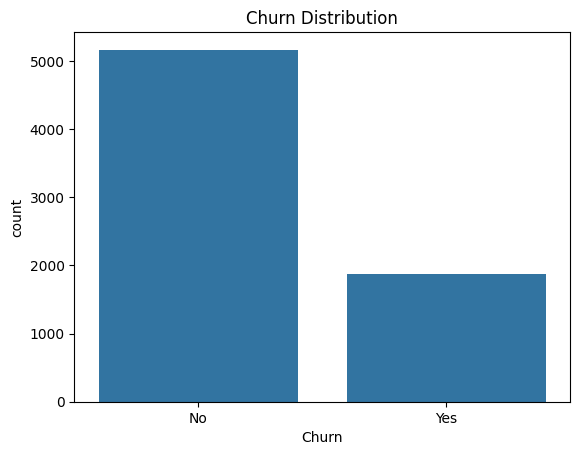

In [4]:
# Count churn cases
print(df["Churn"].value_counts(normalize=True))

# Plot churn distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


Churn                No       Yes
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813


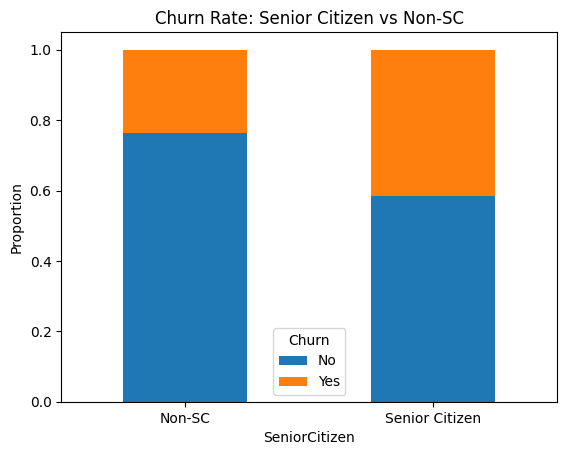

In [5]:
# Cross-tab of SeniorCitizen vs Churn
sc_churn = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index")
print(sc_churn)

# Visualization
sc_churn.plot(kind="bar", stacked=True)
plt.title("Churn Rate: Senior Citizen vs Non-SC")
plt.ylabel("Proportion")
plt.xticks([0, 1], ["Non-SC", "Senior Citizen"], rotation=0)
plt.show()


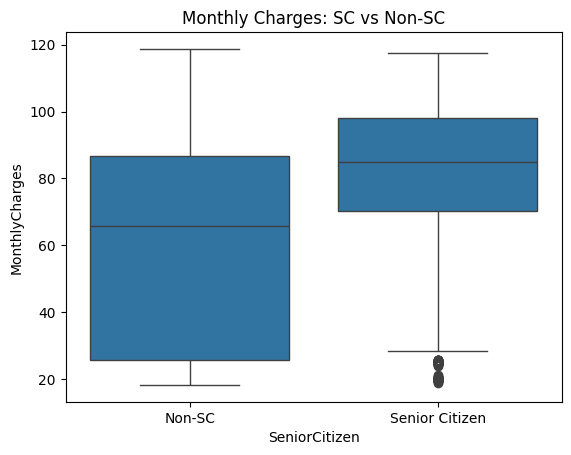

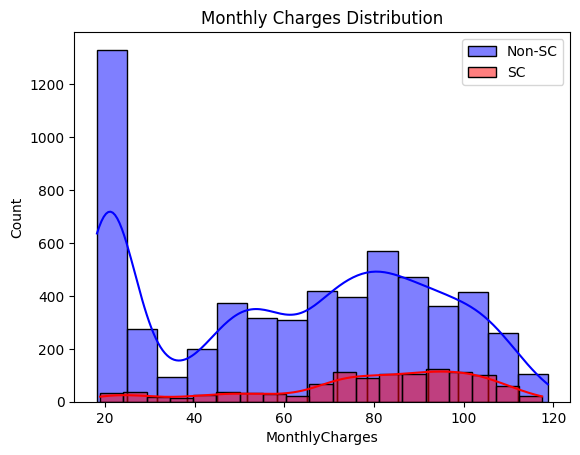

In [6]:
# Boxplot comparison
sns.boxplot(x="SeniorCitizen", y="MonthlyCharges", data=df)
plt.xticks([0,1], ["Non-SC", "Senior Citizen"])
plt.title("Monthly Charges: SC vs Non-SC")
plt.show()

# Histogram comparison
sns.histplot(df[df["SeniorCitizen"]==0]["MonthlyCharges"], color="blue", label="Non-SC", kde=True)
sns.histplot(df[df["SeniorCitizen"]==1]["MonthlyCharges"], color="red", label="SC", kde=True)
plt.legend()
plt.title("Monthly Charges Distribution")
plt.show()


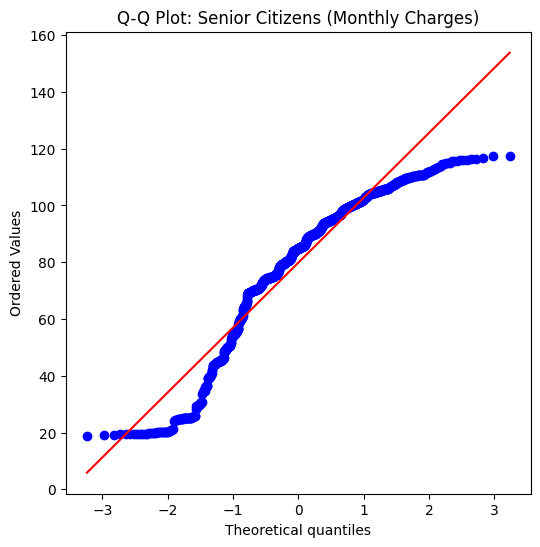

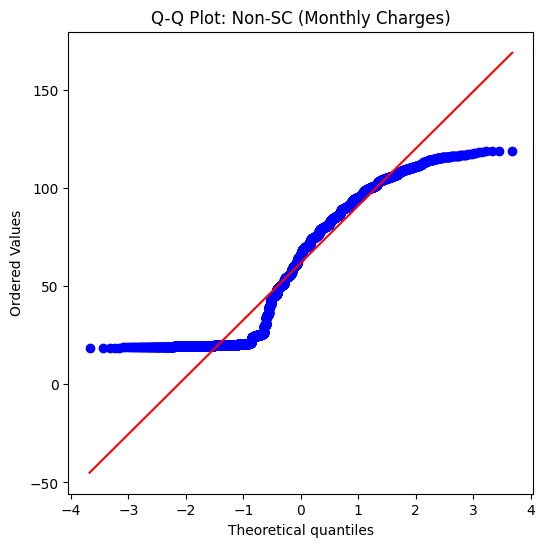

In [7]:
sc = df[df["SeniorCitizen"]==1]["MonthlyCharges"]
non_sc = df[df["SeniorCitizen"]==0]["MonthlyCharges"]

# Q-Q plot
plt.figure(figsize=(6,6))
stats.probplot(sc, dist="norm", plot=plt)
plt.title("Q-Q Plot: Senior Citizens (Monthly Charges)")
plt.show()

plt.figure(figsize=(6,6))
stats.probplot(non_sc, dist="norm", plot=plt)
plt.title("Q-Q Plot: Non-SC (Monthly Charges)")
plt.show()


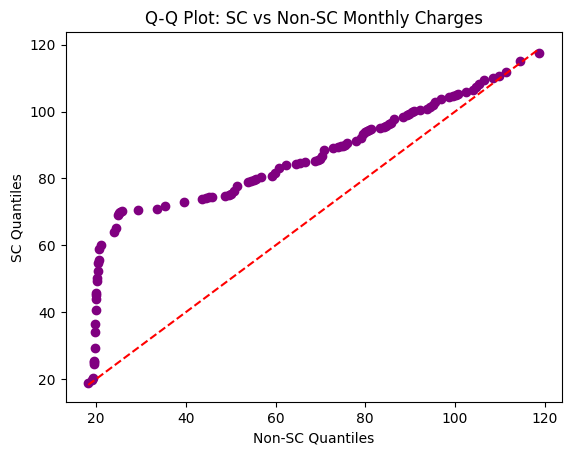

In [8]:
# Direct Q-Q comparison between SC and Non-SC
quantiles = np.linspace(0, 1, 100)
sc_quantiles = np.quantile(sc, quantiles)
non_sc_quantiles = np.quantile(non_sc, quantiles)

plt.scatter(non_sc_quantiles, sc_quantiles, color="purple")
plt.plot([min(non_sc_quantiles), max(non_sc_quantiles)], 
         [min(non_sc_quantiles), max(non_sc_quantiles)], 'r--')
plt.xlabel("Non-SC Quantiles")
plt.ylabel("SC Quantiles")
plt.title("Q-Q Plot: SC vs Non-SC Monthly Charges")
plt.show()
